In [1]:
import tensorflow as tf 
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
from inception_v3 import Inception_V3

In [2]:
# Set up the GPU to avoid the runtime error: Could not create cuDNN handle...
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
def preprocess_input(x):
    
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = np.divide(x, 255.0)
    x = np.subtract(x, 0.5)
    output = np.multiply(x, 2.0)

    return output

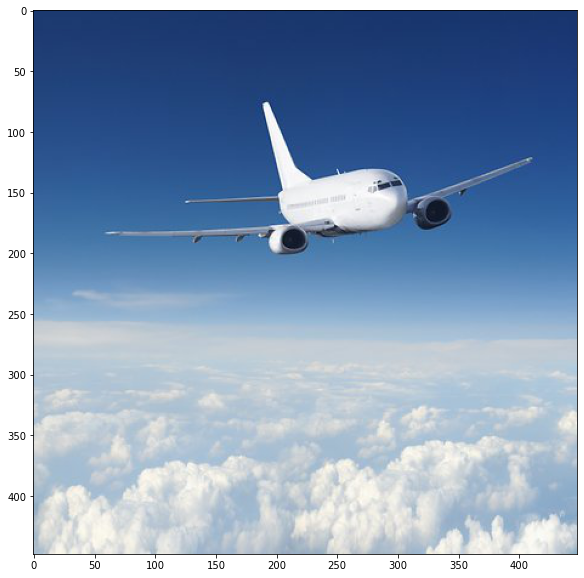

In [4]:
# test image
img_path = '/home/mike/Documents/keras_inception_v3/images/plane.jpg'
image = imread(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [5]:
model = Inception_V3(include_top=True, weights='imagenet')
    
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img

if __name__ == '__main__':

    model = Inception_V3(include_top=True, weights='imagenet')

    img = image.load_img(img_path, target_size=(299,299))
    output = preprocess_input(img)
    print('Input image shape:', output.shape)

    preds = model.predict(output)
    print(np.argmax(preds))
    print('Predicted:', decode_predictions(preds))

Input image shape: (1, 299, 299, 3)
404
Predicted: [[('n02690373', 'airliner', 0.94623446), ('n04592741', 'wing', 0.032647002), ('n04552348', 'warplane', 0.005493908), ('n04266014', 'space_shuttle', 0.00041011118), ('n02692877', 'airship', 0.00033402146)]]
